###**Question**: To what extent does sacrificing sleep for increased study time impact students’ performance on final exams?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/StudentPerformanceFactors.csv")
numeric_data = data.select_dtypes(include=np.number)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


Data Preprocessing

In [ ]:
#Remove For Duplicate Rows
data = data.drop_duplicates()

In [ ]:
#Check For Missing Values
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
#replace missing values with mean/mode
data['Distance_from_Home'] = data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0])
data['Parental_Education_Level'] = data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0])
data['Teacher_Quality'] = data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0])

In [ ]:
#check if exam_score and attendence is bounded [0,100] and remove cells with outliers
data = data[(data['Exam_Score'] >= 0) & (data['Exam_Score'] <= 100)]
data = data[(data['Attendance'] >= 0) & (data['Attendance'] <= 100)]
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


Exploratory Data Analysis

In [ ]:
# getting descriptive statistics about columns
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,19.974266,79.974720,7.029216,75.067817,1.493188,2.967605,67.230548
std,5.990424,11.546219,1.468177,14.399184,1.229907,1.031309,3.868502
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


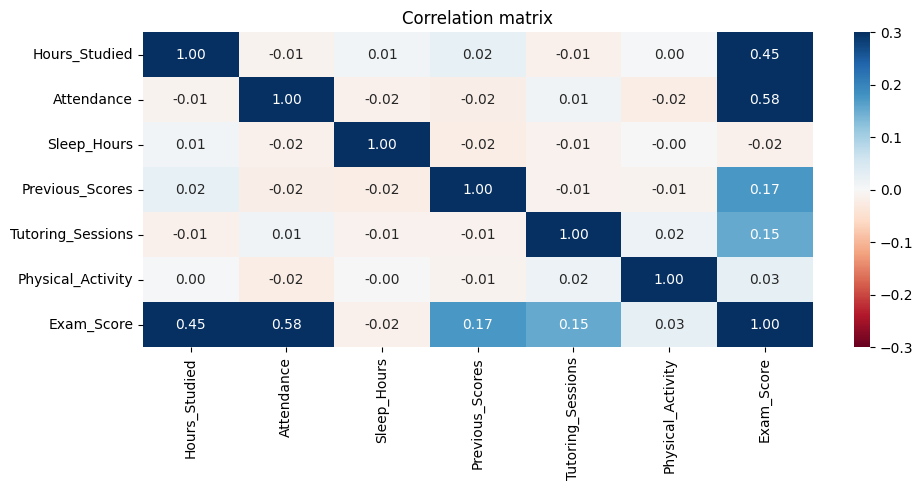

In [ ]:
# Select only numeric columns before calculating correlation
numerical_df = data.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f', vmin=-0.3, vmax=0.3)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

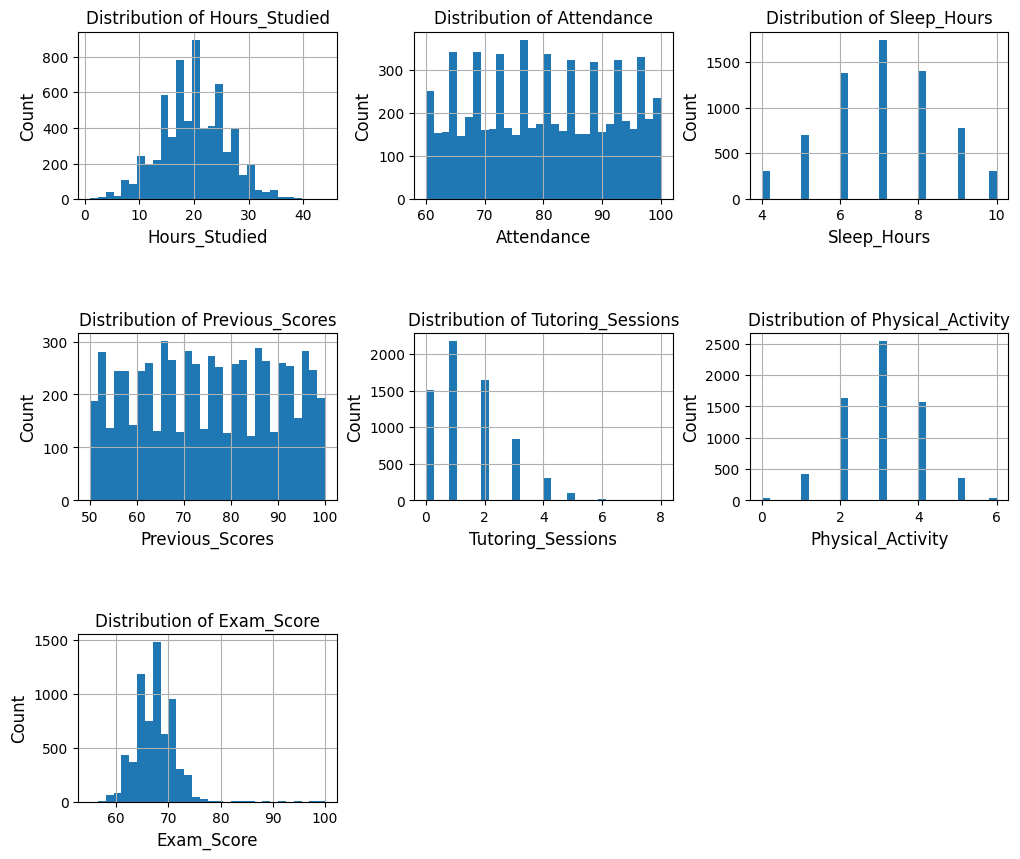

In [ ]:
numerical_df.hist(figsize=(12, 10), bins=30, xlabelsize=10, ylabelsize=10)
plt.subplots_adjust(hspace=0.8)

for ax in plt.gcf().get_axes():
    ax.set_xlabel(ax.get_title(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Distribution of {ax.get_title()}')

plt.show()

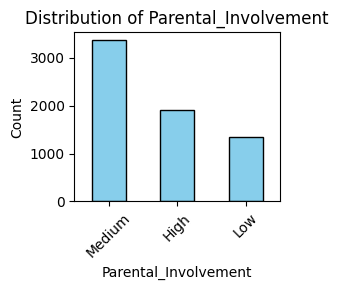

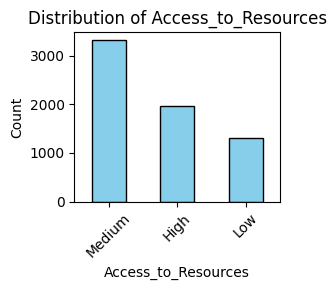

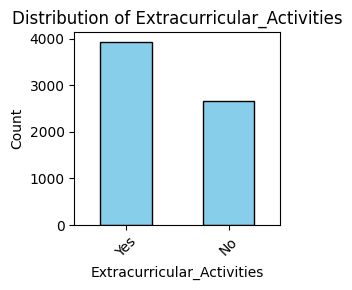

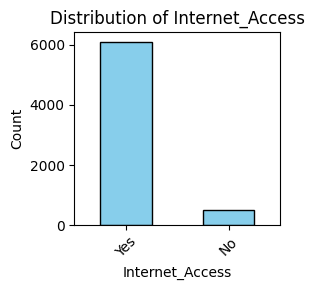

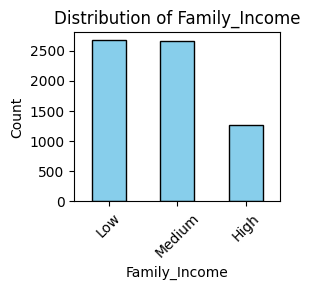

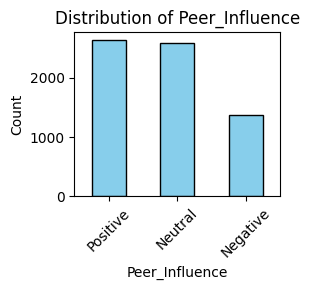

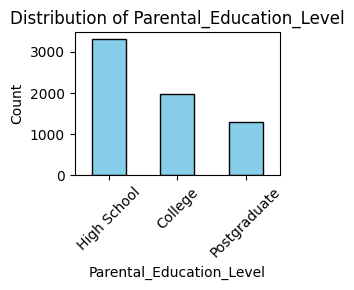

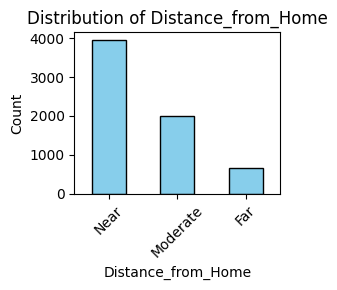

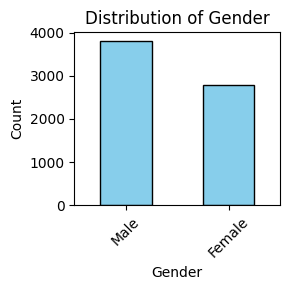

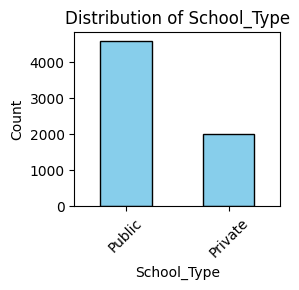

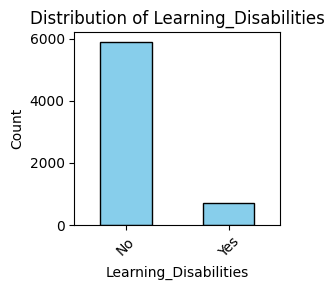

In [ ]:
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                       'Internet_Access', 'Family_Income', 'Peer_Influence', 'Parental_Education_Level',
                       'Distance_from_Home', 'Gender', 'School_Type', 'Learning_Disabilities']

# Create bar charts for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(3, 3))
    data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the layout to make space for labels
    plt.show()

<ipython-input-349-636f77658382>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


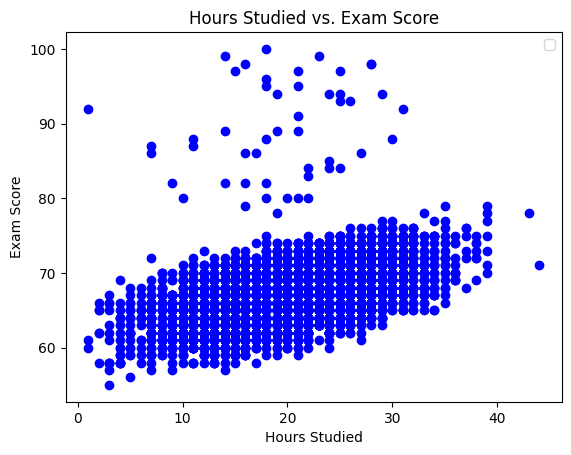

<ipython-input-349-636f77658382>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


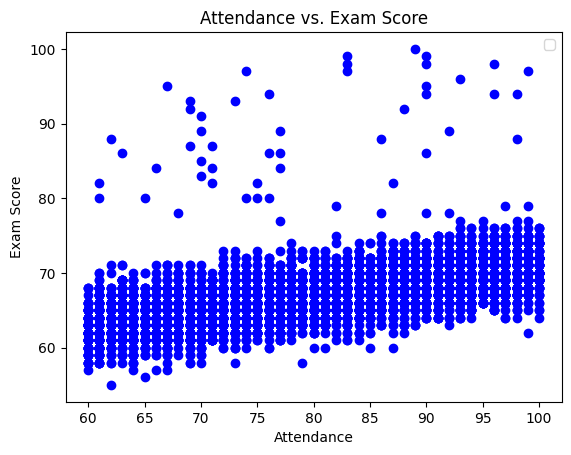

<ipython-input-349-636f77658382>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


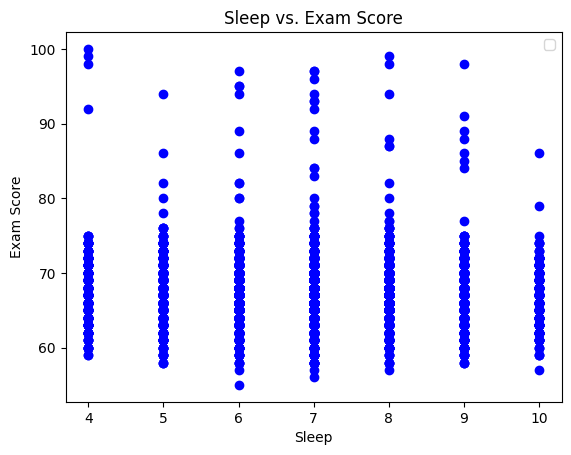

In [ ]:
plt.scatter(data[['Hours_Studied']],  data['Exam_Score'], color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs. Exam Score')
plt.legend()
plt.show()

plt.scatter(data[['Attendance']],  data['Exam_Score'], color='blue')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Attendance vs. Exam Score')
plt.legend()
plt.show()

plt.scatter(data[['Sleep_Hours']],  data['Exam_Score'], color='blue')
plt.xlabel('Sleep')
plt.ylabel('Exam Score')
plt.title('Sleep vs. Exam Score')
plt.legend()
plt.show()


Problem Formulation

For question 1, the dependent variable is Exam Score (Exam_Score) while the independent variables include all other variables. For question 2, the dependent variable is Exam Score (Exam_Score) while the independent variables is Hours_Studied and Sleep_Hours.

Questions:
1. How much of the exam score can be predicted by the independent variables?
2. How do study hours and sleep hours together impact exam performance, and is the effect of study hours stronger than that of sleep?

We will process the data by encoding to account for categorical variables.

In [ ]:
# Label Encoding For Parental_Involvement
data['Parental_Involvement'] = data['Parental_Involvement'].replace({'None':0,'Low': 1, 'Medium': 2, 'High': 3})

# Label Encoding For Parental_Education_Level
data['Parental_Education_Level'] = data['Parental_Education_Level'].replace({'None':0,'Low': 1, 'Medium': 2, 'High': 3})

# Label Encoding For Family_Income_Level
data['Family_Income'] = data['Family_Income'].replace({'Low':0,'Medium': 1, 'High': 2})

# Label Encoding Parental_Education_Level
data['Parental_Education_Level'] = data['Parental_Education_Level'].replace({'None':0,'High School': 1, 'College': 2, 'Postgraduate': 3})

# Label Encoding for Access_to_Resources (Low, Medium, High)
data['Access_to_Resources'] = data['Access_to_Resources'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Label Encoding for Teacher Quality (Low, Medium, High)
data['Access_to_Resources'] = data['Access_to_Resources'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Label Encoding for Extracurricular_Activities (Yes, No)
data['Teacher_Quality'] = data['Teacher_Quality'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Label Encoding for Motivationan Level (Low, Medium, High)
data['Motivation_Level'] = data['Motivation_Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Label Encoding for Peer_Influence (Positive, Neutral, Negative)
data['Peer_Influence'] = data['Peer_Influence'].replace({'Negative': 0, 'Neutral': 1, 'Positive': 2})

# Label Encoding for Distance_from_Home (Near, Moderate, Far)
data['Distance_from_Home'] = data['Distance_from_Home'].replace({'Near': 1, 'Moderate': 2, 'Far': 3})


#One Hot Encoding for non-ordinal categorical features
data = pd.get_dummies(data, columns=['Gender', 'Physical_Activity', 'Extracurricular_Activities', 'Learning_Disabilities', 'School_Type', 'Internet_Access'])

<ipython-input-350-49920f84df48>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Parental_Involvement'] = data['Parental_Involvement'].replace({'None':0,'Low': 1, 'Medium': 2, 'High': 3})
<ipython-input-350-49920f84df48>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Family_Income'] = data['Family_Income'].replace({'Low':0,'Medium': 1, 'High': 2})
<ipython-input-350-49920f84df48>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, ex

Modeling

In [ ]:
X = data.drop(columns=['Exam_Score'])
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

print("Model: Exam_Score = {:.3f}".format(intercept), end=" ")

for i, col in enumerate(X.columns):
    print("+ {:.3f} * {}".format(coefficients[i], col), end=" ")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("\nAll Independent Variables v.s Exam Score")
print("\nMean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Test R^2 Score:", r2)
print("Training R^2 Score:",model.score(X_train,y_train))

Model: Exam_Score = 32.827 + 0.292 * Hours_Studied + 0.198 * Attendance + 1.016 * Parental_Involvement + 1.046 * Access_to_Resources + -0.008 * Sleep_Hours + 0.049 * Previous_Scores + 0.540 * Motivation_Level + 0.483 * Tutoring_Sessions + 0.500 * Family_Income + 0.527 * Teacher_Quality + 0.495 * Peer_Influence + 0.506 * Parental_Education_Level + -0.466 * Distance_from_Home + 0.008 * Gender_Female + -0.008 * Gender_Male + -0.483 * Physical_Activity_0 + -0.386 * Physical_Activity_1 + -0.168 * Physical_Activity_2 + -0.085 * Physical_Activity_3 + 0.108 * Physical_Activity_4 + 0.468 * Physical_Activity_5 + 0.547 * Physical_Activity_6 + -0.275 * Extracurricular_Activities_No + 0.275 * Extracurricular_Activities_Yes + 0.444 * Learning_Disabilities_No + -0.444 * Learning_Disabilities_Yes + -0.005 * School_Type_Private + 0.005 * School_Type_Public + -0.472 * Internet_Access_No + 0.472 * Internet_Access_Yes 
All Independent Variables v.s Exam Score

Mean Squared Error: 2.30628484955193
Root Mea

Model: Exam_Score = 61.546 + 0.286 * Hours_Studied 
Hours Studied v.s Exam Score

Test Mean Squared Error: 9.959765026425044
Test Root Mean Squared Error: 3.155909540279164
Test R^2 Score: 0.24685419920309715
Training R^2 Score: 0.18883663374113968
Random Forest Mean Squared Error: 10.054402518737213
Random Forest Root Mean Squared Error: 3.170867786385489
Random Forest R² Score: 0.23969782254724725


<ipython-input-368-b2d8c359478f>:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


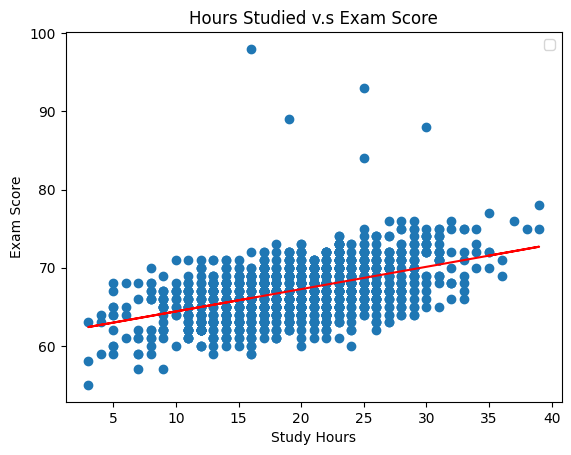

In [ ]:
X = data[['Hours_Studied']]
y = data['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

print("Model: Exam_Score = {:.3f}".format(intercept), end=" ")

for i, col in enumerate(X.columns):
    print("+ {:.3f} * {}".format(coefficients[i], col), end=" ")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print('\nHours Studied v.s Exam Score')
print("\nTest Mean Squared Error:", mse)
print("Test Root Mean Squared Error:", rmse)
print("Test R^2 Score:", r2)
print("Training R^2 Score:",model.score(X_train,y_train))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Hours Studied v.s Exam Score')
plt.legend()
plt.show()

Model: Exam_Score = 51.538 + 0.197 * Attendance 
Attedance v.s Exam Score

Mean Squared Error: 8.426809937995177
Root Mean Squared Error: 2.9028968183514854
Test R^2 Score: 0.3627744728840525
Training R^2 Score: 0.3338922377152188


<ipython-input-361-bf2a3bec96ed>:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


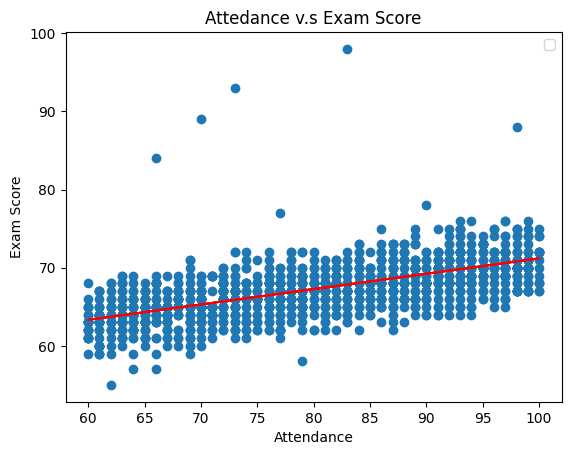

In [ ]:
X = data[['Attendance']]
y = data['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

print("Model: Exam_Score = {:.3f}".format(intercept), end=" ")

for i, col in enumerate(X.columns):
    print("+ {:.3f} * {}".format(coefficients[i], col), end=" ")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print('\nAttedance v.s Exam Score')
print("\nMean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Test R^2 Score:", r2)
print("Training R^2 Score:",model.score(X_train,y_train))


plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Attedance v.s Exam Score')
plt.legend()
plt.show()

Model: Exam_Score = 67.600 + -0.048 * Sleep_Hours 
Hours Slept v.s Exam Score

Mean Squared Error: 13.250774969106885
Root Mean Squared Error: 3.6401613932773484
Test R^2 Score: -0.0020081295903520147
Training R^2 Score: 0.0003231753214911759


<ipython-input-362-1e60ed27724e>:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


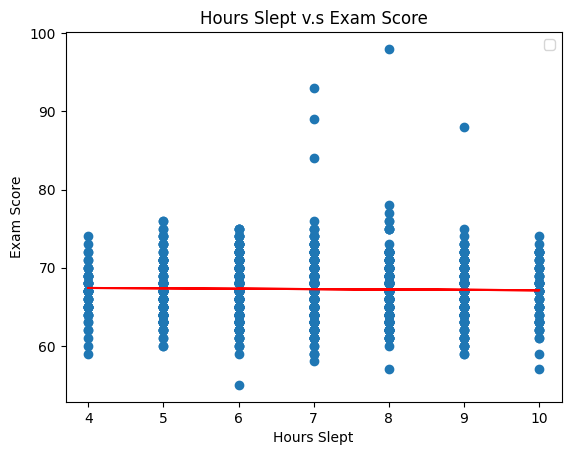

In [ ]:
X = data[['Sleep_Hours']]
y = data['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

print("Model: Exam_Score = {:.3f}".format(intercept), end=" ")

for i, col in enumerate(X.columns):
    print("+ {:.3f} * {}".format(coefficients[i], col), end=" ")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print('\nHours Slept v.s Exam Score')
print("\nMean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Test R^2 Score:", r2)
print("Training R^2 Score:",model.score(X_train,y_train))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Hours Slept')
plt.ylabel('Exam Score')
plt.title('Hours Slept v.s Exam Score')
plt.legend()
plt.show()

In [ ]:
X = data[['Sleep_Hours', 'Hours_Studied']]
y = data['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

print("Model: Exam_Score = {:.3f}".format(intercept), end=" ")

for i, col in enumerate(X.columns):
    print("+ {:.3f} * {}".format(coefficients[i], col), end=" ")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print('\nSleep_Hour & Hours_Studied v.s. Exam Score')
print("\nMean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Test R^2 Score:", r2)
print("Training R^2 Score:",model.score(X_train,y_train))

Model: Exam_Score = 62.000 + -0.065 * Sleep_Hours + 0.286 * Hours_Studied 
Sleep_Hour & Hours_Studied v.s. Exam Score

Mean Squared Error: 9.964070457878496
Root Mean Squared Error: 3.156591588704262
Test R^2 Score: 0.24652862750424864
Training R^2 Score: 0.18943669934069218


In [ ]:
X = data[['Attendance', 'Hours_Studied']]
y = data['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

print("Model: Exam_Score = {:.3f}".format(intercept), end=" ")

for i, col in enumerate(X.columns):
    print("+ {:.3f} * {}".format(coefficients[i], col), end=" ")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print('\nAttendance & Hours_Studied v.s. Exam Score')
print("\nMean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Test R^2 Score:", r2)
print("Training R^2 Score:",model.score(X_train,y_train))

Model: Exam_Score = 45.654 + 0.198 * Attendance + 0.289 * Hours_Studied 
Attendance & Hours_Studied v.s. Exam Score

Mean Squared Error: 5.002813524417554
Root Mean Squared Error: 2.2366970122074097
Test R^2 Score: 0.6216930833118797
Training R^2 Score: 0.5270591608967558


Modeling Evaluation

How much of the exam score can be predicted by the independent variables?

- With an R^2 Score of 0.8256, 82.56% of the variance in Exam_Score can be explained by the independent variables in the model. In other words, the model with all the independent variables does a good job of predicting the exam scores.

How do study hours and sleep hours together impact exam performance, and is the effect of study hours stronger than that of sleep?
- With an R^2 of 0.2465, 24.65% of the variance in Exam_Score can be explained by both Study Hours and Sleep Hours together. This suggests that these two variables alone do not explain much of the variation in exam scores compared to the full set of independent variables, which had an R^2 of 0.8256. We had expected Sleep Hours to have a stronger R² with Exam Score and to account for a greater percentage of the variation in exam scores. However, we were surprised to find that it only had an R^2 of approximately -0.002, indicating a very weak or negligible relationship with exam performance.

- Additionally, due to our bias as college students—who may often skip classes or underestimate the importance of attendance—we were surprised to learn that Attendance accounted for a larger percentage of the variation in exam scores than any other independent variable, including Study Hours. This insight makes sense, though, as consistent attendance likely provides students with a better understanding of the material, more opportunities for engagement, and clearer guidance from instructors, all of which can have a significant impact on exam performance.

